In [1]:
import sys
sys.path.append('d:/flagellar/code/core')
sys.path.append('/flagellar/code/core')
sys.path.append('/flagellar/input/my-flg-library/')
import flg_support as fls
import importlib
import numpy as np
import flg_diagnostics
import flg_numerics
import matplotlib.pyplot as plt
import glob
import copy
importlib.reload(fls);
fls.profiling=False

MainProcess
MainProcess


In [2]:
files = glob.glob(fls.result_dir + '/many_abbr_full/Baseline_*0M*')
models = [fls.dill_load(f) for f in files]
models = sorted(models, key=lambda d:d.trained_model.seed)

In [3]:
todo = slice(None)
data = copy.deepcopy(models[0].inferred_test_data[todo])

In [4]:
# for m in models[0:1]:
#     m.trained_model.step1Labels.relative_confidence_threshold = 0.001
#     m.inferred_test_data = m.trained_model.infer(m.test_data)

In [5]:
models[0].trained_model.step1Labels.seed

0

In [6]:
highest_false_score = []
real_score = []
for i_type in range(3):
    model = copy.deepcopy(models[0].trained_model)
    model.step1Labels.relative_confidence_threshold = 0.001
    #m.step2Motors.distance_threshold = 10.
    if i_type == 0:
        # baseline
        pass
    elif i_type==1:
        # blur
        model = copy.deepcopy(models[0].trained_model)
        model.step1Labels.preprocessor.blur_xy = 1.
    elif i_type == 2:
        # blur + MA
        model = copy.deepcopy(models[0].trained_model)
        model.step1Labels.preprocessor.blur_xy = 1.
        model.step1Labels.preprocessor.scale_moving_average = True
        model.step1Labels.preprocessor.scale_also_moving_std = True
    model.run_in_parallel = True
    inferred_data = model.infer(models[0].test_data[todo])
    for d in inferred_data:
        d.labels_unfiltered = d.labels_unfiltered2
    fls.mark_tf_pn(inferred_data, models[0].test_data[todo])
    this_highest_false_score = []
    this_real_score = []
    for i,r in zip(inferred_data, models[0].test_data[todo]):
        false_positives = i.labels_unfiltered[i.labels_unfiltered['tf_pn']==1.]
        if len(false_positives)>0:
            this_highest_false_score.append(np.max(false_positives['confidence']))
        else:
            this_highest_false_score.append(0)
        if len(r.labels)>0:
            true_positives = i.labels_unfiltered[i.labels_unfiltered['tf_pn']==0.]
            if len(true_positives)>0:
                this_real_score.append(np.max(true_positives['confidence']))
            else:
                this_real_score.append(0)
    highest_false_score.append(this_highest_false_score)
    real_score.append(this_real_score)


/opt/conda/lib/python3.11/site-packages/cupyx/jit/_interface.py:173: FutureWarning: cupyx.jit.rawkernel is experimental. The interface can change in the future.
  cupy._util.experimental('cupyx.jit.rawkernel')


SpawnPoolWorker-1
CUDA_VISIBLE_DEVICES= 0
Clearing cupy
YOLOv9s summary (fused): 197 layers, 7,167,475 parameters, 0 gradients, 26.7 GFLOPs
Processing tomogram tomo_512f98 (1/1)
Processing 800 out of 800 slices (CONCENTRATION=1)
FINAL
      z    y    x  confidence
0   636  749  898    0.299072
1   586    1   12    0.113953
2   434   90  721    0.104492
3   729  218  936    0.033478
4   122    2  702    0.017578
5   528  885  537    0.016403
6   596  437  291    0.009056
7   552  528  400    0.006641
8   139  134  604    0.005600
9    75  512  415    0.004330
10  474  674  801    0.003708
11  176  390  688    0.002472
12    8  267  955    0.001714
13   58  807  954    0.001012
14  166  259  602    0.000993
15   49   58  249    0.000886
16  743   26  291    0.000727
17  589  446    5    0.000712
18  162  385  956    0.000644
19  666  760  463    0.000614
20   96   89   15    0.000607
21  389    1   73    0.000455
22  527   68  321    0.000441
23  310  431  715    0.000411
24  172  107  3

/opt/conda/lib/python3.11/site-packages/cupyx/jit/_interface.py:173: FutureWarning: cupyx.jit.rawkernel is experimental. The interface can change in the future.
  cupy._util.experimental('cupyx.jit.rawkernel')


SpawnPoolWorker-2
CUDA_VISIBLE_DEVICES= 0
Clearing cupy
YOLOv9s summary (fused): 197 layers, 7,167,475 parameters, 0 gradients, 26.7 GFLOPs
Processing tomogram tomo_512f98 (1/1)
Processing 800 out of 800 slices (CONCENTRATION=1)
FINAL
     z    y    x  confidence
0  301  231  908    0.122925
1  629    3   49    0.049408
2  124    4  244    0.039062
3  227    3  533    0.028015
4  622  322  622    0.025955

Clearing pytorch
Clearing cupy
Processing tomogram tomo_d0d9b6 (1/1)
Processing 800 out of 800 slices (CONCENTRATION=1)
FINAL
     z    y    x  confidence
0  419  290  833    0.592773
1  515  857  423    0.226807

Clearing pytorch
Clearing cupy
Processing tomogram tomo_53c71b (1/1)
Processing 800 out of 800 slices (CONCENTRATION=1)
FINAL
     z    y    x  confidence
0  411  273  509    0.660156
1  318  923  945    0.267334
2  191  923  946    0.146606

Clearing pytorch
Clearing cupy
Processing tomogram tomo_bcb115 (1/1)
Processing 300 out of 300 slices (CONCENTRATION=1)
FINAL
     z 

/opt/conda/lib/python3.11/site-packages/cupyx/jit/_interface.py:173: FutureWarning: cupyx.jit.rawkernel is experimental. The interface can change in the future.
  cupy._util.experimental('cupyx.jit.rawkernel')


SpawnPoolWorker-3
CUDA_VISIBLE_DEVICES= 0
Clearing cupy
YOLOv9s summary (fused): 197 layers, 7,167,475 parameters, 0 gradients, 26.7 GFLOPs
Processing tomogram tomo_512f98 (1/1)
Processing 800 out of 800 slices (CONCENTRATION=1)
FINAL
     z    y    x  confidence
0  301  230  908    0.166138
1  559   38  130    0.044189

Clearing pytorch
Clearing cupy
Processing tomogram tomo_d0d9b6 (1/1)
Processing 800 out of 800 slices (CONCENTRATION=1)
FINAL
     z    y    x  confidence
0  416  291  831    0.713867
1  515  857  425    0.544922

Clearing pytorch
Clearing cupy
Processing tomogram tomo_53c71b (1/1)
Processing 800 out of 800 slices (CONCENTRATION=1)
FINAL
     z    y    x  confidence
0  411  275  509    0.775879
1  269  634  688    0.250977
2  494  660  299    0.194946
3  329  836  906    0.194336

Clearing pytorch
Clearing cupy
Processing tomogram tomo_bcb115 (1/1)
Processing 300 out of 300 slices (CONCENTRATION=1)
FINAL
    z    y    x  confidence
0  94  948  671    0.181885

Clearing

In [44]:
def f(v0,v1):
    return v1
    return np.max(np.stack((np.array(v0), np.array(v1))),axis=0)
f([1,2,3], [2,30,1])

[2, 30, 1]

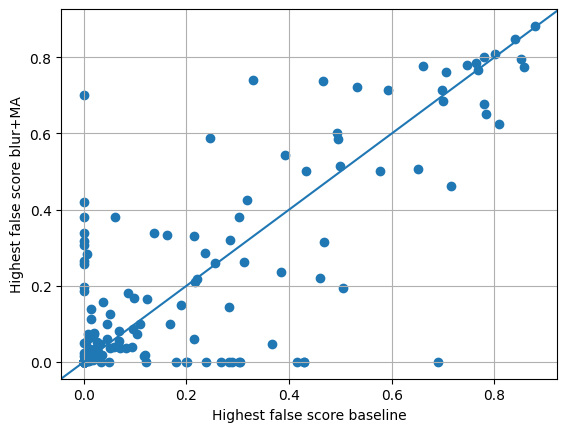

In [60]:
plt.scatter(highest_false_score[1], f(highest_false_score[1], highest_false_score[2]))
plt.xlabel('Highest false score baseline')
plt.ylabel('Highest false score blur+MA')
plt.grid(True)
plt.axline((0,0),slope=1)

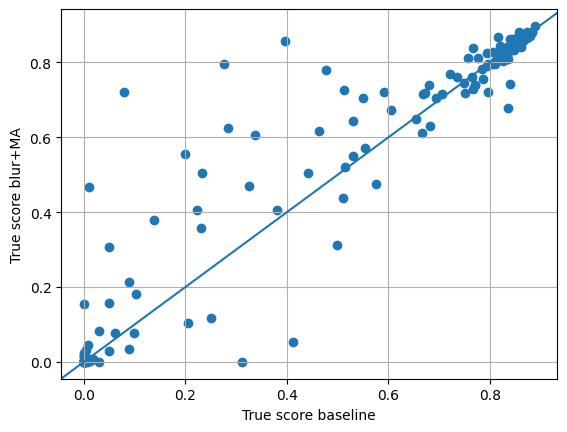

In [61]:
plt.scatter(real_score[1], f(real_score[1], real_score[2]))
plt.xlabel('True score baseline')
plt.ylabel('True score blur+MA')
plt.grid(True)
plt.axline((0,0),slope=1)

In [34]:
xx=np.argwhere(np.logical_and(np.array(highest_false_score[2])>0.6, np.array(highest_false_score[0])<0.01))
xx

array([[87]])

In [35]:
cur_id = 87
for ii in range(len(models[0].test_data[todo])):
    if len(models[0].test_data[todo][ii].labels)>0:        
        if cur_id in xx:
            print(models[0].test_data[todo][ii].name,ii,real_score[0][cur_id],real_score[2][cur_id])
        cur_id+=1

ycw2013-01-03-27 30 0.0009965896606445312 0.08331298828125


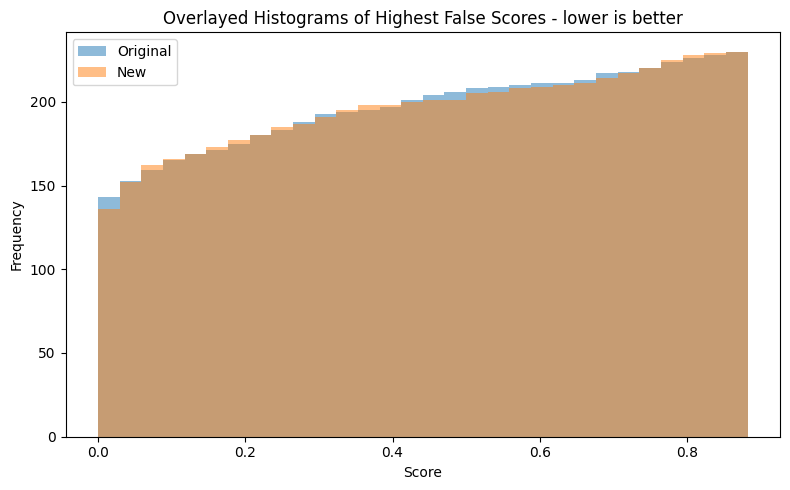

In [63]:
import numpy as np
import matplotlib.pyplot as plt

# flatten the two arrays into one to get global bin edges
all_scores = np.concatenate([highest_false_score[1], highest_false_score[2]])
# choose number of bins (e.g. 30) or compute automatically
bins = np.histogram_bin_edges(all_scores, bins=30)

plt.figure(figsize=(8, 5))
plt.hist(highest_false_score[1], bins=bins, cumulative=True, alpha=0.5, label='Original')
plt.hist(highest_false_score[2], bins=bins, cumulative=True, alpha=0.5, label='New')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Overlayed Histograms of Highest False Scores - lower is better')
plt.legend()
plt.tight_layout()
plt.show()

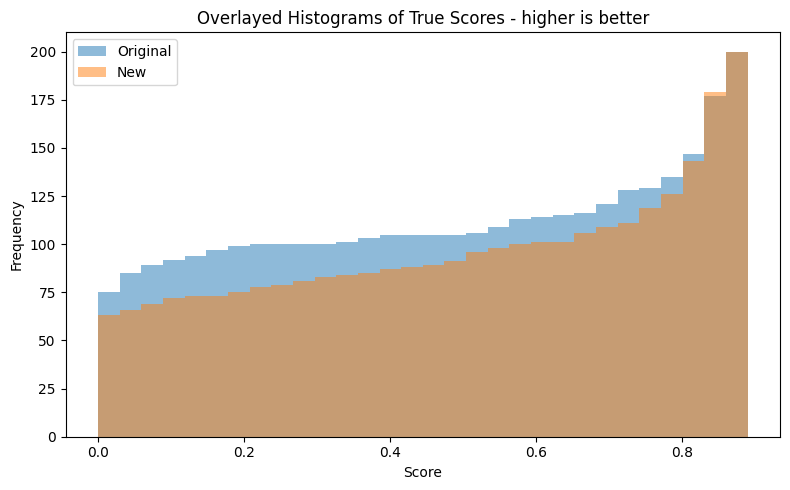

In [65]:
import numpy as np
import matplotlib.pyplot as plt

# flatten the two arrays into one to get global bin edges
all_scores = np.concatenate([real_score[0], real_score[1]])
# choose number of bins (e.g. 30) or compute automatically
bins = np.histogram_bin_edges(all_scores, bins=30)

plt.figure(figsize=(8, 5))
plt.hist(real_score[0], bins=bins, cumulative=True, alpha=0.5, label='Original')
plt.hist(real_score[1], bins=bins, cumulative=True, alpha=0.5, label='New')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Overlayed Histograms of True Scores - higher is better')
plt.legend()
plt.tight_layout()
plt.show()